### Init


In [4]:
# Loading the libraries
from util import *
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import random
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

In [46]:
all_data = pd.read_csv(r'..\Preprocessed_datasets\preprocessed_wine.csv', index_col=0)
errors = all_data['errors']
features = all_data.drop(['predicted_class', 'true_class', 'errors'], axis=1)

### Scaling the features

In [47]:
# Scaling all attributes
to_scale = features.columns
features[to_scale] = StandardScaler().fit_transform(features[to_scale])
features[:5]

# Scaling the errors
errors_col = MinMaxScaler(feature_range = (0,1.0)).fit_transform(all_data[['errors']])
scaling_factor = 0.8 #needs to be converted to scaling range
scaled_errors = scaling_factor * errors_col

### Utils

In [48]:
# TODO: experiment with different random states, increase number of runs
clus_model_kwargs = {
    "n_clusters": 2,
    "init": "k-means++",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 2,
}


In [49]:
def plot_clusters(data):    
    scatterplot = sns.scatterplot(data=data, x="alcohol", y="ash", hue="clusters", size='errors', sizes=(100, 20), palette="tab10")
    plt.show()

In [50]:
def accuracy(results):
    correct = results.loc[results['errors'] == 0]
    # print('Correct:', len(correct), ' -  Total:', len(results))
    acc = len(correct)/len(results)
    # print('Accuracy:', acc)
    return acc

def bias_acc(data, cluster_id, cluster_col):
    cluster_x = data.loc[data[cluster_col] == cluster_id]
    remaining_clusters = data.loc[data[cluster_col] != cluster_id]
    return accuracy(remaining_clusters) - accuracy(cluster_x)

def get_next_cluster(data):
    n_cluster = max(data['clusters'])
    highest_variance = -1
    cluster_number = 0

    for i in range(0, n_cluster):
        cluster_i = data.loc[data['clusters'] == i]
        variance_cluster = np.var(cluster_i['errors'])
        
        if variance_cluster > highest_variance:
            highest_variance = variance_cluster
            cluster_number = i
            print('--> Cluster with the highest variance:', cluster_number)

    return cluster_number

## Clustering without errors as feature 

In [51]:
# Combine scaled features w. class & error labels
full_data = features.copy(deep=True)
full_data['true_class'] = all_data[['true_class']]
full_data['predicted_class'] = all_data[['predicted_class']]
full_data['errors'] = all_data[['errors']]
full_data['clusters'] = 0
full_data['new_clusters'] = -1
full_data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,true_class,predicted_class,errors,clusters,new_clusters
12,0.687846,-0.160373,0.141557,-0.694417,-0.834587,0.004312,0.267992,-0.318793,0.017405,0.697247,0.405843,-0.146241,1.256507,0.0,0,0.0,0,-1
23,-0.356751,-0.343481,0.502356,-0.101678,-0.381526,-0.222556,-0.278564,-0.635733,-0.650337,-0.367414,-0.033392,1.394286,0.408775,0.0,1,1.0,0,-1
25,-0.124619,0.290352,2.798346,2.269277,1.808272,0.061029,0.155878,1.582845,0.227267,-0.590546,0.259431,0.486852,-0.105424,0.0,0,0.0,0,-1
35,0.374467,-0.047692,0.141557,0.787430,-0.003974,0.193369,0.576306,-0.635733,0.112797,0.378486,-0.399421,1.056636,0.144727,0.0,1,1.0,0,-1
13,1.848509,-0.160373,0.075958,-2.209194,-0.683567,0.949596,1.571320,1.160258,1.925240,0.569743,1.137900,-0.504994,0.784001,0.0,2,1.0,0,-1


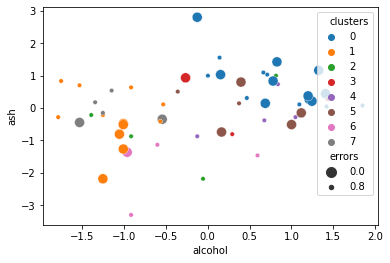

----- Clustering Iteration 1
Splitting on cluster 0


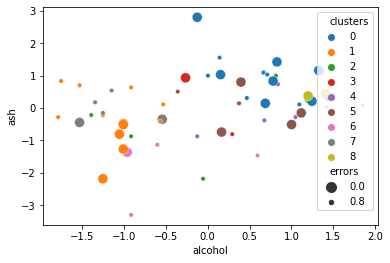

--> Cluster with the highest variance: 0
Variance clusters:  0.05489801635497322
----- Clustering Iteration 2
Splitting on cluster 0
Initial bias: 0.1748251748251748   -  Max abs. candidate bias: 0.6071428571428572
Min candidate size: 1
The selected cluster is not splitted. Picking a random cluster...
Variance clusters:  0.05489801635497322
----- Clustering Iteration 3
Splitting on cluster 0
Initial bias: 0.1748251748251748   -  Max abs. candidate bias: 0.6071428571428572
Min candidate size: 1
The selected cluster is not splitted. Picking a random cluster...
Variance clusters:  0.05489801635497322
----- Clustering Iteration 4
Splitting on cluster 4
The selected cluster is not splitted. Picking a random cluster...
Variance clusters:  0.05489801635497322
----- Clustering Iteration 5
Splitting on cluster 1


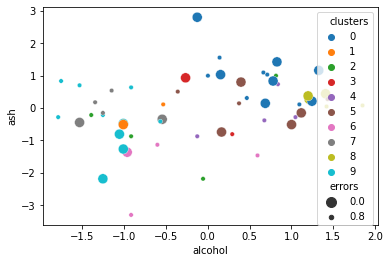

--> Cluster with the highest variance: 0
--> Cluster with the highest variance: 1
Variance clusters:  0.05142246905959717
----- Clustering Iteration 6
Splitting on cluster 1
The selected cluster is not splitted. Picking a random cluster...
Variance clusters:  0.05142246905959717
----- Clustering Iteration 7
Splitting on cluster 6
The selected cluster is not splitted. Picking a random cluster...
Variance clusters:  0.05142246905959717
----- Clustering Iteration 8
Splitting on cluster 1
The selected cluster is not splitted. Picking a random cluster...
Variance clusters:  0.05142246905959717
----- Clustering Iteration 9
Splitting on cluster 9


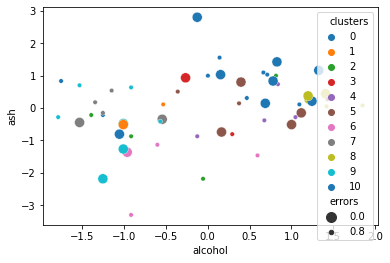

--> Cluster with the highest variance: 0
--> Cluster with the highest variance: 1
Variance clusters:  0.04716477969709129
----- Clustering Iteration 10
Splitting on cluster 1
The selected cluster is not splitted. Picking a random cluster...
Variance clusters:  0.04716477969709129
----- Clustering Iteration 11
Splitting on cluster 8
The selected cluster is not splitted. Picking a random cluster...
Variance clusters:  0.04716477969709129
----- Clustering Iteration 12
Splitting on cluster 1
The selected cluster is not splitted. Picking a random cluster...
Variance clusters:  0.04716477969709129
----- Clustering Iteration 13
Splitting on cluster 9
The selected cluster is not splitted. Picking a random cluster...
Variance clusters:  0.04716477969709129
----- Clustering Iteration 14
Splitting on cluster 0
Initial bias: 0.1748251748251748   -  Max abs. candidate bias: 0.6071428571428572
Min candidate size: 1
The selected cluster is not splitted. Picking a random cluster...
Variance clusters: 

In [30]:
MAX_ITER = 20
x = 0 # cluster number
initial_bias = 0
plot_clusters(full_data)
variance_list = []

for i in range(1, MAX_ITER):
    if i != 1:
        neg_bias_list = []
        for j in full_data['clusters'].unique():
            neg_bias_clus = bias_acc(full_data, j, 'clusters')
            neg_bias_list.append(neg_bias_clus)
        variance_clusters = np.var(neg_bias_list)
        variance_list.append(variance_clusters) #TODO make function 
        print('Variance clusters: ', variance_clusters)
    print('----- Clustering Iteration', i)
    print('Splitting on cluster', x)

    full_data['new_clusters'] = -1
    candidate_cluster = full_data.loc[full_data['clusters'] == x] 

    if len(candidate_cluster) < 8:
        print('The selected cluster is not splitted. Picking a random cluster...')
        n_cluster = max(full_data['clusters'])
        x = random.randint(0, n_cluster)
        initial_bias = abs(bias_acc(full_data, x, 'clusters'))
        continue
    
    # Apply Kmeans 
    kmeans_algo = KMeans(**clus_model_kwargs).fit(candidate_cluster.drop(['clusters', 'new_clusters', 'predicted_class', 'true_class', 'errors'], axis=1))
    
    candidate_cluster['new_clusters'] = pd.DataFrame(kmeans_algo.predict(candidate_cluster.drop(['clusters', 'new_clusters', 'predicted_class', 'true_class', 'errors'], axis=1)),index=candidate_cluster.index) 
    # print(candidate_cluster.head())

    full_data['new_clusters'] = candidate_cluster['new_clusters'].combine_first(full_data['new_clusters'])
    # print(full_data.head())
        
    # calculate bias & cluster size for each of the two clusters
    negative_bias_0 = bias_acc(full_data, 0, 'new_clusters')
    negative_bias_1 = bias_acc(full_data, 1, 'new_clusters') 
    max_abs_bias = max(abs(negative_bias_0), abs(negative_bias_1))
    min_new_size = min( len(full_data.loc[full_data['new_clusters']==0]), len(full_data.loc[full_data['new_clusters']==1]) )
    
    if (max_abs_bias >= initial_bias) & (min_new_size > 1): 
        # Add new cluster
        n_cluster = max(full_data['clusters'])
        full_data['clusters'][full_data['new_clusters'] == 1] =  n_cluster + 1
        #print(full_data.head())
        
        plot_clusters(full_data)

        x = get_next_cluster(full_data)
        initial_bias = abs(bias_acc(full_data, x, 'clusters'))
    else:
        print('Initial bias:', initial_bias, '  -  Max abs. candidate bias:', max_abs_bias)
        print('Min candidate size:', min_new_size)
        print('The selected cluster is not splitted. Picking a random cluster...')
        n_cluster = max(full_data['clusters'])
        x = random.randint(0, n_cluster)
        initial_bias = abs(bias_acc(full_data, x, 'clusters'))
        
print('MAX_ITER')

print(variance_list)

,variance excl errors
0,0.001276
1,0.013285
2,0.011611
3,0.013861
4,0.012421
5,0.012421
6,0.012421
7,0.017917
8,0.017917
9,0.017917


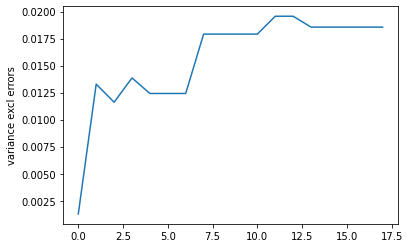

In [60]:
variance_df = pd.DataFrame(variance_list).rename(columns={0:"variance excl errors"})
sns.lineplot(data=variance_df, x=variance_df.index,y="variance excl errors")
# variance_df['without errors'] = variance_df
variance_df

## Bias-Aware Clustering with errors as attribute


In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Scaling the features 
# to_scale = features.columns
# features[to_scale] = MinMaxScaler(feature_range=0.2,1).fit_transform(features[to_scale])
# features[:5]

# errors = MinMaxScaler(feature_range = (0,1.0)).fit_transform(full_data[['errors']])
# scaling_factor = 0.8 #needs to be converted to scaling range

# scaled_errors = scaling_factor * scaled_errors
# scaled_errors

In [61]:
# # Combine scaled features w. class & error labels
full_data = features.copy(deep=True)
full_data['true_class'] = all_data[['true_class']]
full_data['predicted_class'] = all_data[['predicted_class']]
full_data['errors'] = scaled_errors
full_data['clusters'] = 0
full_data['new_clusters'] = -1
full_data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,true_class,predicted_class,errors,clusters,new_clusters
12,0.687846,-0.160373,0.141557,-0.694417,-0.834587,0.004312,0.267992,-0.318793,0.017405,0.697247,0.405843,-0.146241,1.256507,0.0,0,0.0,0,-1
23,-0.356751,-0.343481,0.502356,-0.101678,-0.381526,-0.222556,-0.278564,-0.635733,-0.650337,-0.367414,-0.033392,1.394286,0.408775,0.0,1,0.8,0,-1
25,-0.124619,0.290352,2.798346,2.269277,1.808272,0.061029,0.155878,1.582845,0.227267,-0.590546,0.259431,0.486852,-0.105424,0.0,0,0.0,0,-1
35,0.374467,-0.047692,0.141557,0.787430,-0.003974,0.193369,0.576306,-0.635733,0.112797,0.378486,-0.399421,1.056636,0.144727,0.0,1,0.8,0,-1
13,1.848509,-0.160373,0.075958,-2.209194,-0.683567,0.949596,1.571320,1.160258,1.925240,0.569743,1.137900,-0.504994,0.784001,0.0,2,0.8,0,-1


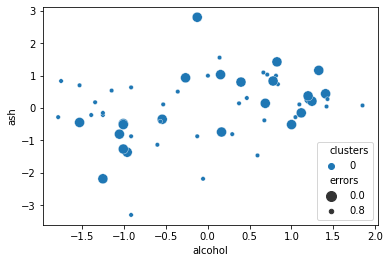

----- Clustering Iteration 1
Splitting on cluster 0


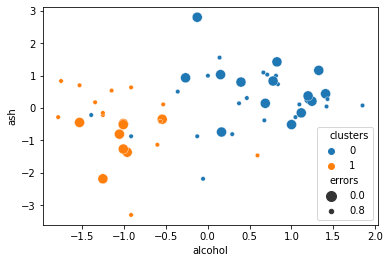

--> Cluster with the highest variance: 0
Variance clusters:  0.0012755102040816356
----- Clustering Iteration 2
Splitting on cluster 0


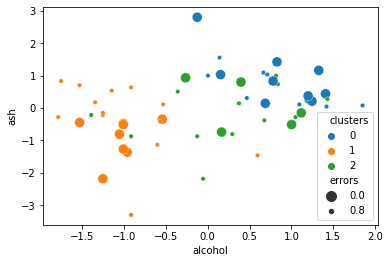

--> Cluster with the highest variance: 0
Variance clusters:  0.028141233116813102
----- Clustering Iteration 3
Splitting on cluster 0
Initial bias: 0.22222222222222227   -  Max abs. candidate bias: 0.21538461538461534
Min candidate size: 5
The selected cluster is not splitted. Picking a random cluster...
Variance clusters:  0.028141233116813102
----- Clustering Iteration 4
Splitting on cluster 1


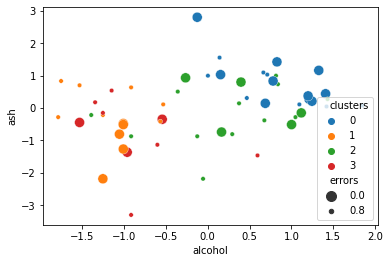

--> Cluster with the highest variance: 0
Variance clusters:  0.022543511213383015
----- Clustering Iteration 5
Splitting on cluster 0
Initial bias: 0.22222222222222227   -  Max abs. candidate bias: 0.21538461538461534
Min candidate size: 5
The selected cluster is not splitted. Picking a random cluster...
Variance clusters:  0.022543511213383015
----- Clustering Iteration 6
Splitting on cluster 2


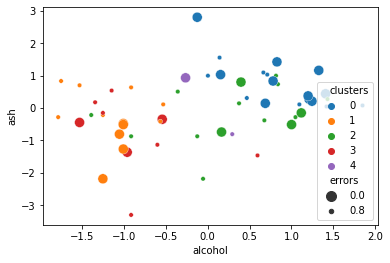

--> Cluster with the highest variance: 0
Variance clusters:  0.018881761428851382
----- Clustering Iteration 7
Splitting on cluster 0
Initial bias: 0.22222222222222227   -  Max abs. candidate bias: 0.21538461538461534
Min candidate size: 5
The selected cluster is not splitted. Picking a random cluster...
Variance clusters:  0.018881761428851382
----- Clustering Iteration 8
Splitting on cluster 2


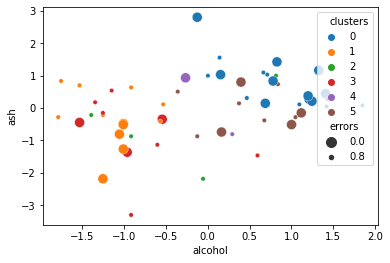

--> Cluster with the highest variance: 0
Variance clusters:  0.037656206012029035
----- Clustering Iteration 9
Splitting on cluster 0
Initial bias: 0.22222222222222227   -  Max abs. candidate bias: 0.21538461538461534
Min candidate size: 5
The selected cluster is not splitted. Picking a random cluster...
Variance clusters:  0.037656206012029035
----- Clustering Iteration 10
Splitting on cluster 1


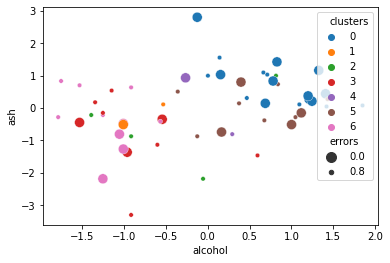

--> Cluster with the highest variance: 0
--> Cluster with the highest variance: 1
Variance clusters:  0.03538713477424972
----- Clustering Iteration 11
Splitting on cluster 1
The selected cluster is not splitted. Picking a random cluster...
Variance clusters:  0.03538713477424972
----- Clustering Iteration 12
Splitting on cluster 6


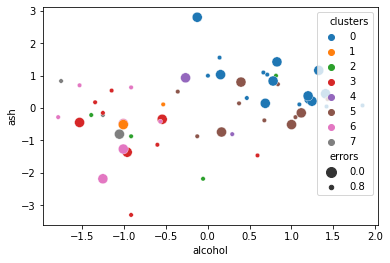

--> Cluster with the highest variance: 0
--> Cluster with the highest variance: 1
Variance clusters:  0.03153931589207009
----- Clustering Iteration 13
Splitting on cluster 1
The selected cluster is not splitted. Picking a random cluster...
Variance clusters:  0.03153931589207009
----- Clustering Iteration 14
Splitting on cluster 5


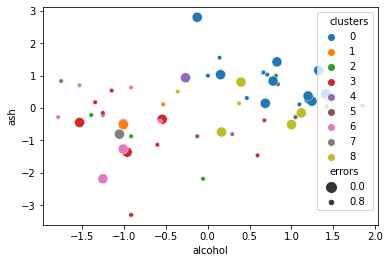

--> Cluster with the highest variance: 0
--> Cluster with the highest variance: 1
Variance clusters:  0.050768216846378104
----- Clustering Iteration 15
Splitting on cluster 1
The selected cluster is not splitted. Picking a random cluster...
Variance clusters:  0.050768216846378104
----- Clustering Iteration 16
Splitting on cluster 1
The selected cluster is not splitted. Picking a random cluster...
Variance clusters:  0.050768216846378104
----- Clustering Iteration 17
Splitting on cluster 2
The selected cluster is not splitted. Picking a random cluster...
Variance clusters:  0.050768216846378104
----- Clustering Iteration 18
Splitting on cluster 7
The selected cluster is not splitted. Picking a random cluster...
Variance clusters:  0.050768216846378104
----- Clustering Iteration 19
Splitting on cluster 4
The selected cluster is not splitted. Picking a random cluster...
MAX_ITER
[0.0012755102040816356, 0.028141233116813102, 0.028141233116813102, 0.022543511213383015, 0.02254351121338301

In [62]:
MAX_ITER = 20
x = 0 # cluster number
initial_bias = 0
plot_clusters(full_data)
variance_list_errors = []

for i in range(1, MAX_ITER):
    if i != 1:
        neg_bias_list = []
        for j in full_data['clusters'].unique():
            neg_bias_clus = bias_acc(full_data, j, 'clusters')
            neg_bias_list.append(neg_bias_clus)
        variance_clusters = np.var(neg_bias_list)
        variance_list_errors.append(variance_clusters) #TODO make function 
        print('Variance clusters: ', variance_clusters)
    print('----- Clustering Iteration', i)
    print('Splitting on cluster', x)

    full_data['new_clusters'] = -1
    candidate_cluster = full_data.loc[full_data['clusters'] == x] 
    #print(candidate_cluster.head())

    if len(candidate_cluster) < 8:
        print('The selected cluster is not splitted. Picking a random cluster...')
        n_cluster = max(full_data['clusters'])
        x = random.randint(0, n_cluster)
        initial_bias = abs(bias_acc(full_data, x, 'clusters'))
        continue
    
    # Apply Kmeans 
    kmeans_algo = KMeans(**clus_model_kwargs).fit(candidate_cluster.drop(['clusters', 'new_clusters', 'predicted_class', 'true_class'], axis=1))
    
    candidate_cluster['new_clusters'] = pd.DataFrame(kmeans_algo.predict(candidate_cluster.drop(['clusters', 'new_clusters', 'predicted_class', 'true_class'], axis=1)),index=candidate_cluster.index) 
    # print(candidate_cluster.head())

    full_data['new_clusters'] = candidate_cluster['new_clusters'].combine_first(full_data['new_clusters'])
    # print(full_data.head())
        
    # calculate bias & cluster size for each of the two clusters
    negative_bias_0 = bias_acc(full_data, 0, 'new_clusters')
    negative_bias_1 = bias_acc(full_data, 1, 'new_clusters') 
    max_abs_bias = max(abs(negative_bias_0), abs(negative_bias_1))
    min_new_size = min( len(full_data.loc[full_data['new_clusters']==0]), len(full_data.loc[full_data['new_clusters']==1]) )
    
    if (max_abs_bias >= initial_bias) & (min_new_size > 1): 
        # Add new cluster
        n_cluster = max(full_data['clusters'])
        full_data['clusters'][full_data['new_clusters'] == 1] =  n_cluster + 1
        #print(full_data.head())
        
        plot_clusters(full_data)

        x = get_next_cluster(full_data)
        initial_bias = abs(bias_acc(full_data, x, 'clusters'))
    else:
        print('Initial bias:', initial_bias, '  -  Max abs. candidate bias:', max_abs_bias)
        print('Min candidate size:', min_new_size)
        print('The selected cluster is not splitted. Picking a random cluster...')
        n_cluster = max(full_data['clusters'])
        x = random.randint(0, n_cluster)
        initial_bias = abs(bias_acc(full_data, x, 'clusters'))
        
print('MAX_ITER')
print(variance_list_errors)

,variance incl errors,variance without errors
0,0.001276,0.001276
1,0.028141,0.013285
2,0.028141,0.011611
3,0.022544,0.013861
4,0.022544,0.012421
5,0.018882,0.012421
6,0.018882,0.012421
7,0.037656,0.017917
8,0.037656,0.017917
9,0.035387,0.017917


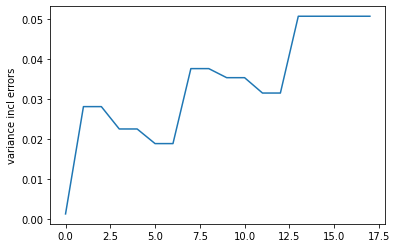

In [72]:
variance_errors = pd.DataFrame(variance_list_errors).rename(columns={0:"variance incl errors"})
sns.lineplot(data=variance_errors, x=variance_errors.index,y="variance incl errors")
# variance_errors['with errors'] = variance_errors
variance_errors['variance without errors'] = variance_df[['variance excl errors']]
# needs to be fixed
variance_errors

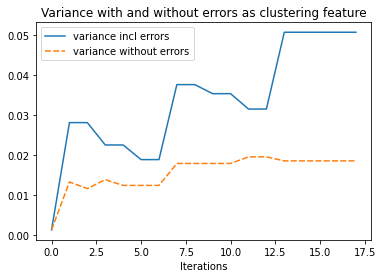

In [77]:
import matplotlib.pyplot as plt
fig = sns.lineplot(data=variance_errors).set_title('Variance with and without errors as clustering feature')
plt.xlabel('Iterations')
plt.ylabel=('Bias')

In [18]:
# exporting the biased cluster dataframe for further analysis
import os
path = r'..\\Clustered_datasets\\'
# full_data.to_csv(os.path.join(path, r'biased_wine_clusters.csv'))
